# **Analysis of Employee Attrition Factors to Develop Effective Retention Strategies**
---

## **1. Introduction**

### **1.1 Background & Business Context**
In today’s competitive job market, keeping employees has become an important part of long-term business success. When an employee leaves, or attrition, it’s more than just filling an open role, it can be a costly and disruptive loss. <br>
According to industry research, the cost to hire and train a replacement is significant. Studies from organizations like Gallup show it can cost anywhere from half to two times that employee's annual salary (Gallup, 2019). This means that for an employee earning $60,000 a year, the replacement cost could be between $30,000 and $120,000. 

But the impact goes beyond money. A high attrition rate creates serious challenges for a company in several ways:
* **Financial Impact**: Constantly spending on recruitment, training new employees, and sometimes severance packages reduces overall profitability.
* **Operational Impact**: When experienced employees leave, valuable knowledge is lost. The remaining team often faces lower productivity and heavier workloads, which can lead to even more people leaving.
* **Strategic Impact**: High turnover can hurt the company’s reputation as an employer, making it harder to attract and keep top talent in the future.

This project looks at HR data from a fictional company to find out why employees leave. By using data insights, the company can move from a reactive approach (replacing employees after they leave) to a proactive one (building a workplace where employees want to stay and grow).

**References**
* Gallup, Inc. (2019). This Fixable Problem Costs U.S. Businesses $1 Trillion. Gallup. Retrieved from https://www.gallup.com/workplace/247391/fixable-problem-costs-businesses-trillion.aspx

* Society for Human Resource Management (SHRM). Talent Acquisition: A Guide to Understanding and Managing Employee Turnover. SHRM. Retrieved from https://www.shrm.org/content/dam/en/shrm/topics-tools/news/Retaining-Talent.pdf

### **1.2 Problem Statement**

The company is facing a concerning attrition rate, but its exact causes have not been clearly identified. Without a deep understanding of the driving factors, efforts to reduce attrition are ineffective and waste resources.

Therefore, this analysis aims to answer the following key questions:
1. What are the main driving factors that cause an employee to leave the company?
2. What is the common profile or characteristics of employees who resign most frequently (e.g., based on job role, department, tenure, or demographics)?
3. Are there hidden patterns in the data that can help the company identify employees at high risk of attrition in the future?

### **1.3 Dataset Description**

This analysis uses the public dataset **"IBM HR Analytics Employee Attrition & Performance"**. This is a fictional dataset created by IBM data scientists and is often used as a case study for HR-related problems.
* **Source**: IBM
* **Data Volume**: 1,470 rows, where each row represents a unique employee.
* **Number of Features**: 35 columns or attributes covering a wide range of information about the employees.

This dataset is ideal for this project as it provides a diverse set of features, from demographic data to factors related to job satisfaction and engagement.

## **2. Data Loading**
---
This is the first technical step of the project. The goal here is to load the raw data, take a first look to understand its structure, and check its overall quality before moving on to a deeper analysis.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset from a CSV file into a DataFrame named 'df'
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first 5 rows to ensure the data was loaded successfully
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The display of the first five rows from `df.head()` confirms that columns like `Age`, `Attrition`, and `BusinessTravel` have been read correctly. This provides an initial glimpse into the features available for analysis.

In [4]:
# Display a concise summary of the data table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The summary provides several crucial details about the data:
* **Data Size**: The table contains 1,470 rows, representing 1,470 employees, and 35 columns, or features.
* **Data Quality**: All columns show 1,470 "non-null" entries. This is an important finding, as it means there are no missing values in the dataset.
* **Data Types**: The columns are mostly assigned the correct data types, such as numbers (int64) and text (object).

## **3. Data Cleaning & Preparation**
---
After loading the data, the next essential step is cleaning it. This process involves checking for common issues like missing data or duplicates and removing any irrelevant information. The goal is to ensure the dataset is accurate, consistent, and ready for analysis.

### **3.1. Checking for Missing Values**
First, an explicit check for any missing values was performed across all columns.

In [5]:
# Check for missing values in each column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As suggested by the initial `.info()` summary, this check confirms that there are zero missing values in the dataset. As it means the data is complete and doesn't require any imputation or removal of rows due to missing information.

### **3.2. Checking for Duplicate Rows**
Next, a check was run to see if there were any duplicate rows. This is important to ensure that every single row represents a unique employee record.

In [6]:
# Check for any duplicate rows in the dataset
df.duplicated().sum()

0

The result of this check is zero, which confirms that there are no duplicate entries in the dataset. Every record is unique.

### **3.3. Verifying Data Types and Column Name Format**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Based on the initial` df.info()` summary and the inspection above, the data types are appropriate for each column, and the column names are clean and consistent. No changes are needed for either.

### **3.4. Exploring Categorical Data and Unique Values**

Next, the categorical columns were investigated to understand their contents and identify any columns that might be irrelevant.

First, a high-level look at the number of unique values in each column helps to quickly spot columns with very low or very high variation.

In [8]:
# Display the number of unique values for each column
print("Unique value counts for each column:")
df.nunique()

Unique value counts for each column:


Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

After seeing the count, the next step is to inspect the actual values within each categorical column. This is useful for a final quality check and to understand the specific categories within each feature.

In [9]:
# List unique values from each categorical column
# Select all columns with data type 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values from each categorical column
for col in categorical_columns:
    print(f"Unique values in column {col} are {df[col].unique()}")
    # Display the number of unique values in each categorical column
    print(f"--> Number of unique values in column {col} is {df[col].nunique()}")
    print("")


Unique values in column Attrition are ['Yes' 'No']
--> Number of unique values in column Attrition is 2

Unique values in column BusinessTravel are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--> Number of unique values in column BusinessTravel is 3

Unique values in column Department are ['Sales' 'Research & Development' 'Human Resources']
--> Number of unique values in column Department is 3

Unique values in column EducationField are ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--> Number of unique values in column EducationField is 6

Unique values in column Gender are ['Female' 'Male']
--> Number of unique values in column Gender is 2

Unique values in column JobRole are ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
--> Number of unique values in column JobRole is 9

Unique values in column 

Looking closely at each categorical column serves two main purposes. 
*  First, it acts as a sanity check, confirming that the values are as expected (e.g., `Attrition` only contains 'Yes' and 'No'). 
* Second, it provides a clear view of the different segments available for analysis, such as the various job roles and departments. This step also visually confirms the findings from the .nunique() check, such as the column `Over18` containing only the value 'Y'.

### **3.5 Removing Irrelevant Columns**

The final cleaning step is to identify and remove columns that do not provide any useful information for predicting or understanding employee attrition.
Based on the unique value analysis, the uninformative columns were removed.

In [10]:
# Drop columns that are not useful for the analysis
df_cleaned = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'])

# Display the new dimensions of the dataset to confirm removal
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (1470, 35)
Cleaned dataset shape: (1470, 31)


Four columns were removed from the dataset:
* `EmployeeCount`, `StandardHours`, and `Over18` were removed because they contain the exact same value for every employee. A column with no variation cannot help explain differences in attrition.
* `EmployeeNumber` was removed because it is just a unique identifier for each employee and has no predictive power.

After cleaning, the dataset now has **1,470 rows and 31 columns**.

## **4. Exploratory Data Analysis (EDA)**
---

With a clean dataset, the focus now shifts to uncovering the story hidden within the data. The goal of this EDA is to visually explore the relationships between different employee attributes and attrition. This process will help to identify the key factors that contribute to employees leaving the company.

In [11]:
# Initial setup
# Set a theme for the plots
sns.set_theme(style="whitegrid")

### **Analysis 4.1: What is the Overall Employee Attrition Proportion?**

The analysis starts with the most fundamental question to understand the scale of the problem.

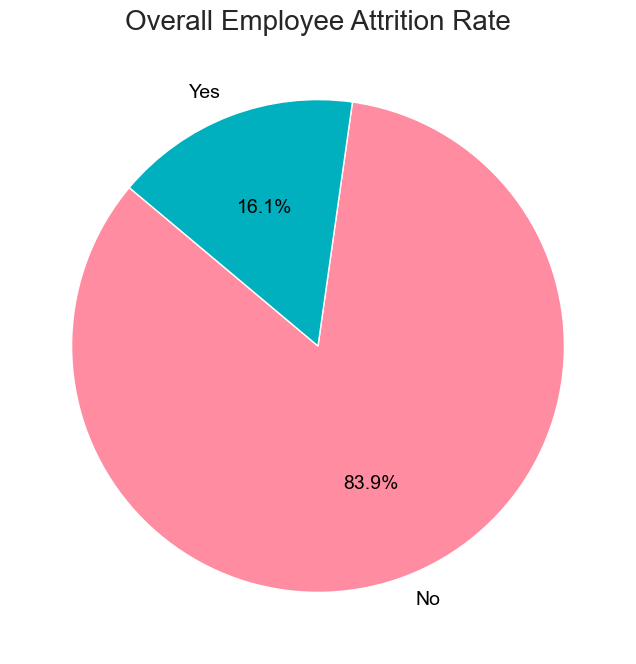

In [12]:
# Calculate the percentage for each category in the 'Attrition' column
attrition_rate = df_cleaned['Attrition'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_rate, labels=attrition_rate.index, autopct='%1.1f%%', startangle=140, 
colors=['#FF8CA1', '#00B0BE'], textprops={'fontsize': 14, 'color': 'black'})
plt.title('Overall Employee Attrition Rate', fontsize=20)
plt.show()

**Insight:**

From the overall data, about **16.1%** of employees have left the company (attrition), while the remaining **83.9%** are still active. Although the attrition number seems to be in the minority, losing 1 out of every 6 employees is a significant figure and potentially costly for any company. This confirms that the attrition problem is real and needs to be addressed.

### **Analysis 4.2: How does working overtime affect attrition?**

Investigating factors related to work-life balance is crucial. This analysis explores the link between working overtime and the likelihood of leaving.

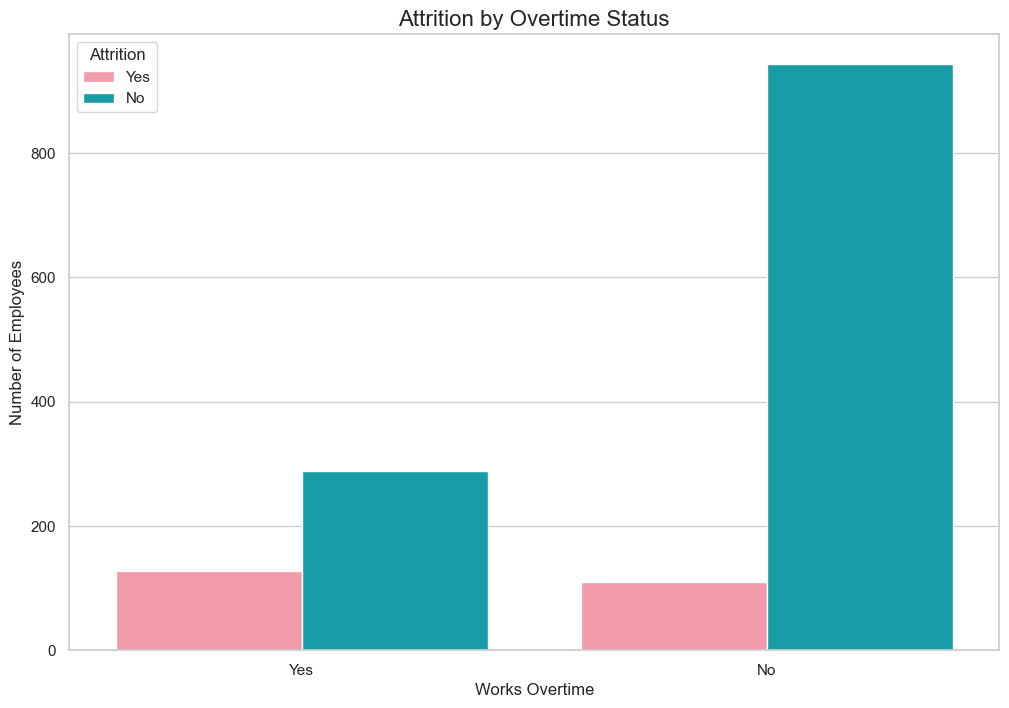

In [13]:
# Create a count plot to visualize attrition by overtime status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='OverTime', hue='Attrition', 
palette=['#FF8CA1', '#00B0BE'])
plt.title('Attrition by Overtime Status', fontsize=16)
plt.xlabel('Works Overtime')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

**Insight:**

The graph shows a very striking difference. **The attrition rate for employees who work overtime is significantly higher than for those who do not.** This is a strong indicator that overtime policies and workload management may be one of the main drivers for employees to seek opportunities elsewhere. Burnout appears to be a significant risk factor.

### **Analysis 4.3: Which job roles have the highest attrition?**


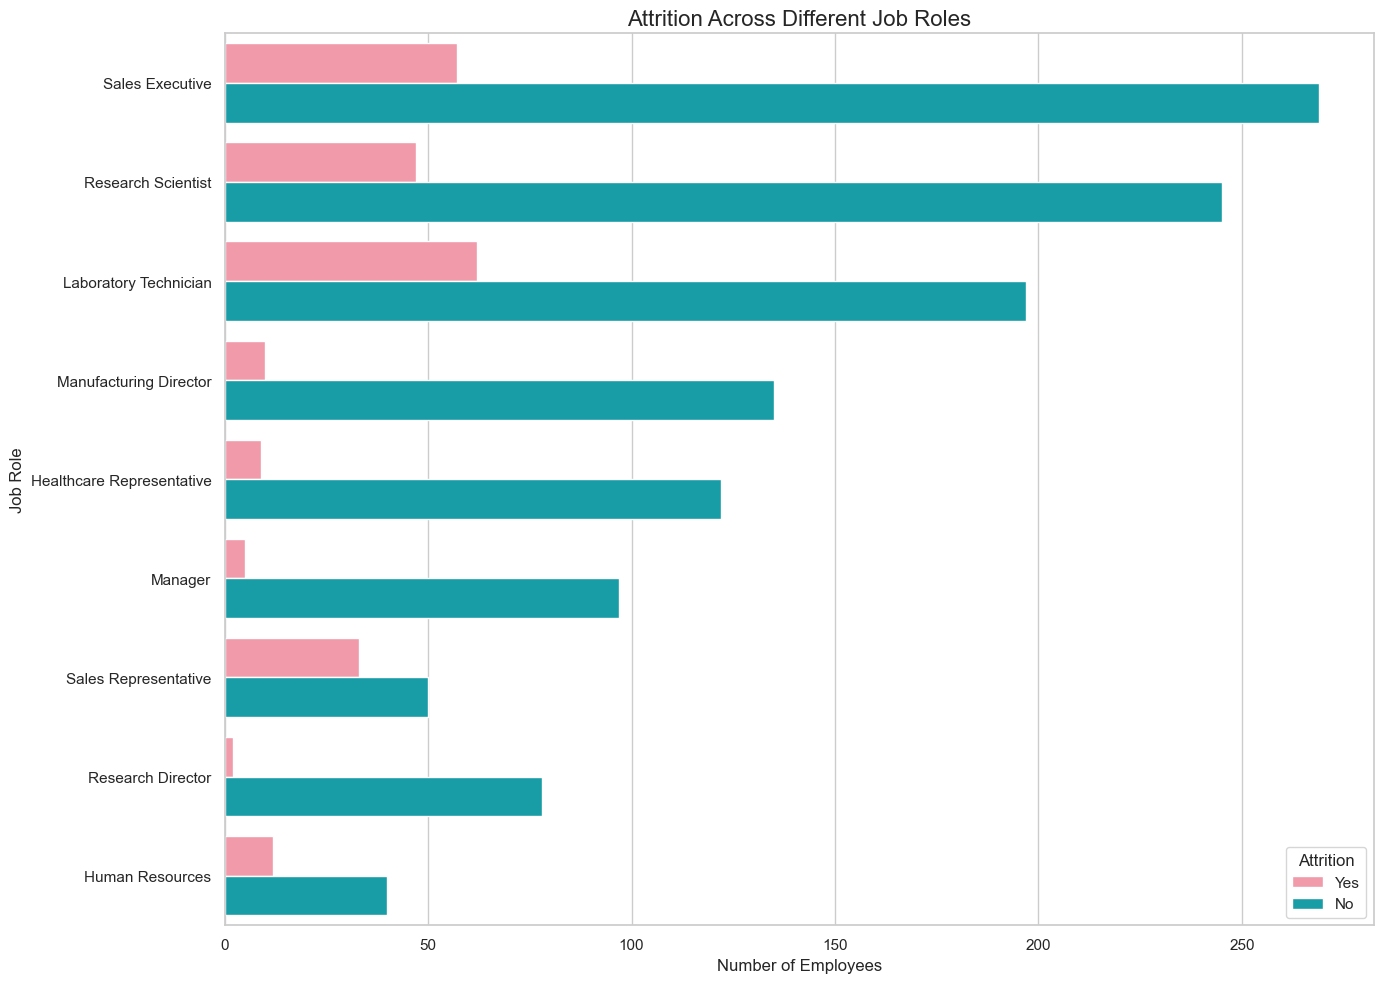

In [25]:
# Create a count plot to visualize attrition across different job roles
plt.figure(figsize=(14, 10))
# Ordering by count makes the chart easier to read
sns.countplot(data=df_cleaned, y='JobRole', hue='Attrition', order=df_cleaned['JobRole'].value_counts().index, 
              palette=['#FF8CA1', '#00B0BE'])
plt.title('Attrition Across Different Job Roles', fontsize=16)
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

**Insight:**

Attrition is not spread evenly across the organization. The **Sales Representative** role experiences the highest number of departures, followed by Laboratory Technicians. In stark contrast, senior roles like Manager and Research Director show very low attrition. This suggests that retention strategies need to be targeted, as the challenges faced by employees vary significantly by job role.

### **Analysis 4.4: What is the relationship between monthly income and attrition?**

Financial compensation is often a key factor in employee satisfaction. This analysis compares the income levels of employees who left versus those who stayed.

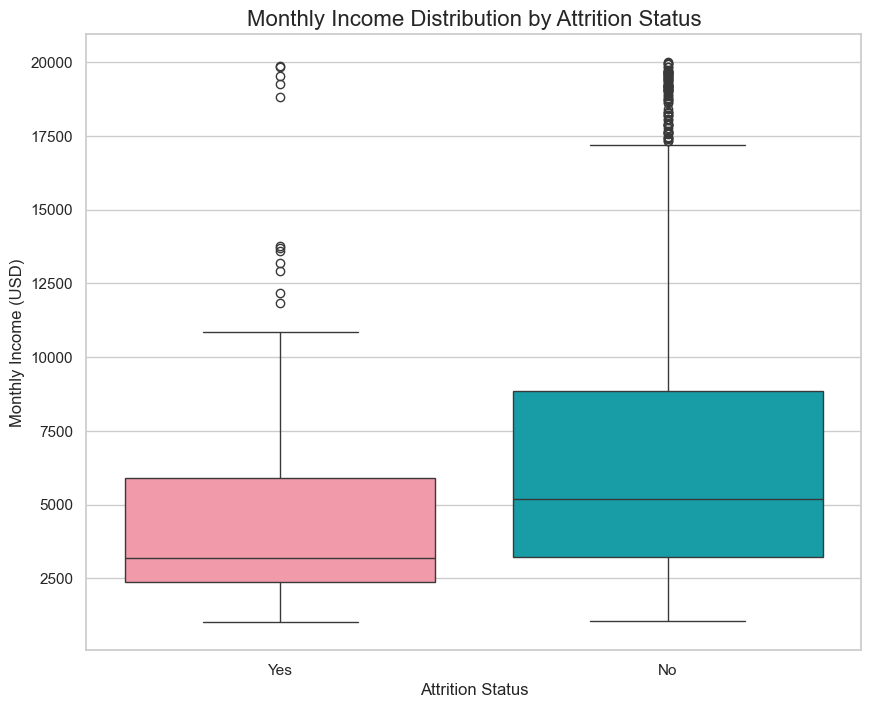

In [21]:
# Create a box plot to compare monthly income distributions
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned, x='Attrition', y='MonthlyIncome', hue='Attrition',
            palette=['#FF8CA1', '#00B0BE'])
plt.title('Monthly Income Distribution by Attrition Status', fontsize=16)
plt.xlabel('Attrition Status')
plt.ylabel('Monthly Income (USD)')
plt.show()

**Insight:**

The box plot clearly illustrates a financial disparity. Employees who left the company generally had a **significantly lower monthly income**. The median income for the "Yes" attrition group is visibly lower than that of the "No" group. This finding strongly supports the hypothesis that lower compensation is a major driver of employee turnover.

### **Analysis 4.5: Does job satisfaction play a role?**

After looking at external factors like pay and job titles, it's important to analyze internal factors like happiness at work. This analysis checks if dissatisfied employees are more likely to leave.

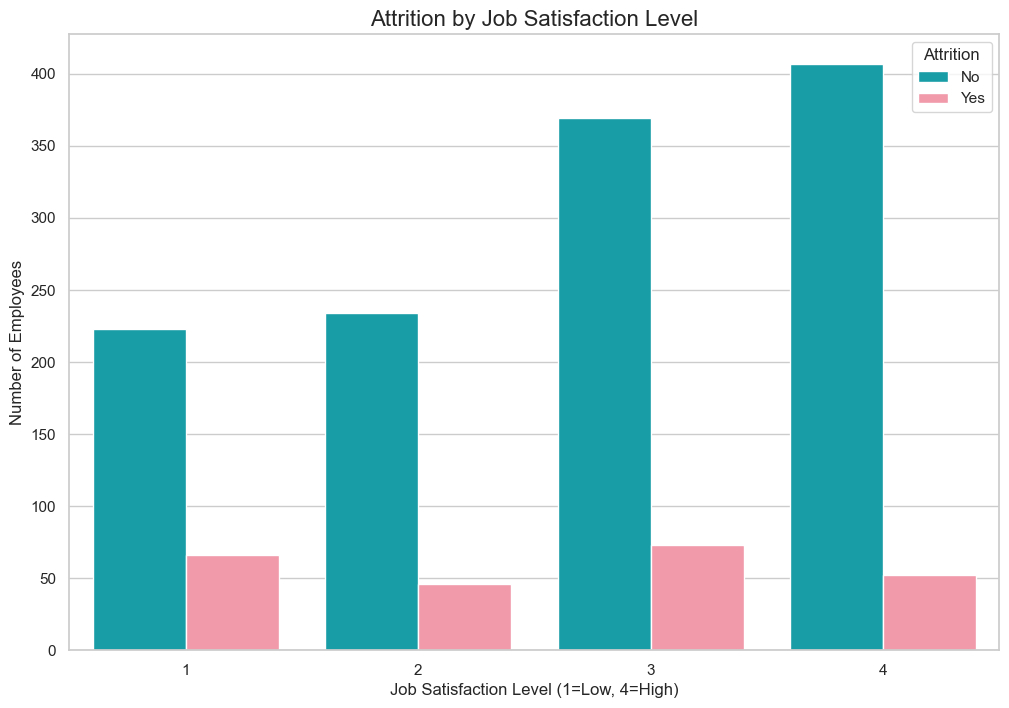

In [29]:
# Create a count plot for Attrition based on JobSatisfaction
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='JobSatisfaction', hue='Attrition', 
              palette=['#00B0BE', '#FF8CA1' ])
plt.title('Attrition by Job Satisfaction Level', fontsize=16)
plt.xlabel('Job Satisfaction Level (1=Low, 4=High)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

**Insight:**

There's a clear link between job satisfaction and attrition. **Employees with a low job satisfaction level (rated as 1) are far more likely to leave the company**. In contrast, employees who report high satisfaction (levels 3 and 4) are much more loyal. This highlights how important it is to keep employees engaged and happy as a retention strategy.

### **Analysis 4.6: How does marital status affect attrition?**

Demographic factors like marital status can influence a person's stability and career decisions. This analysis explores if there's a difference in attrition rates among single, married, or divorced employees.

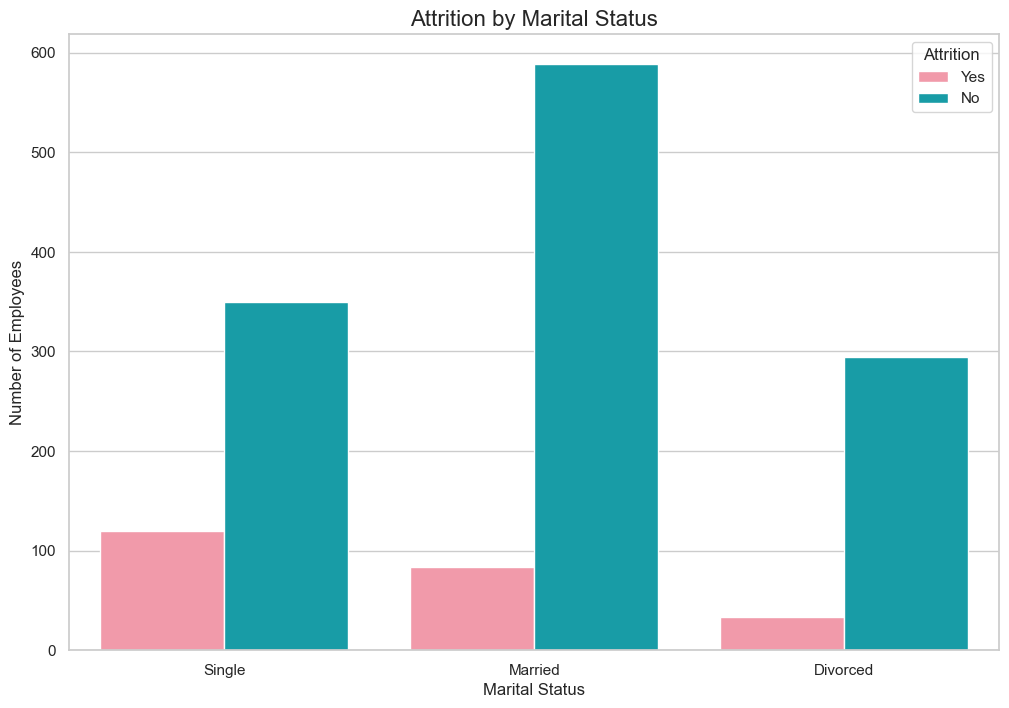

In [31]:
# Create a count plot for Attrition based on MaritalStatus
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='MaritalStatus', hue='Attrition', 
              palette=['#FF8CA1', '#00B0BE'])
plt.title('Attrition by Marital Status', fontsize=16)
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

**Insight:**

Marital status appears to be a significant factor. The data shows that **Single employees have the highest rate of attrition** by a wide margin. Married employees, on the other hand, are the most likely to stay. This could suggest that single employees may have more flexibility to change jobs, while married employees might prioritize stability.

### **Analysis 4.7: What is the link between tenure and attrition?**

This analysis aims to understand at which stage of their career an employee is most likely to leave. Is it the new hires or the long-term employees who leave more often?

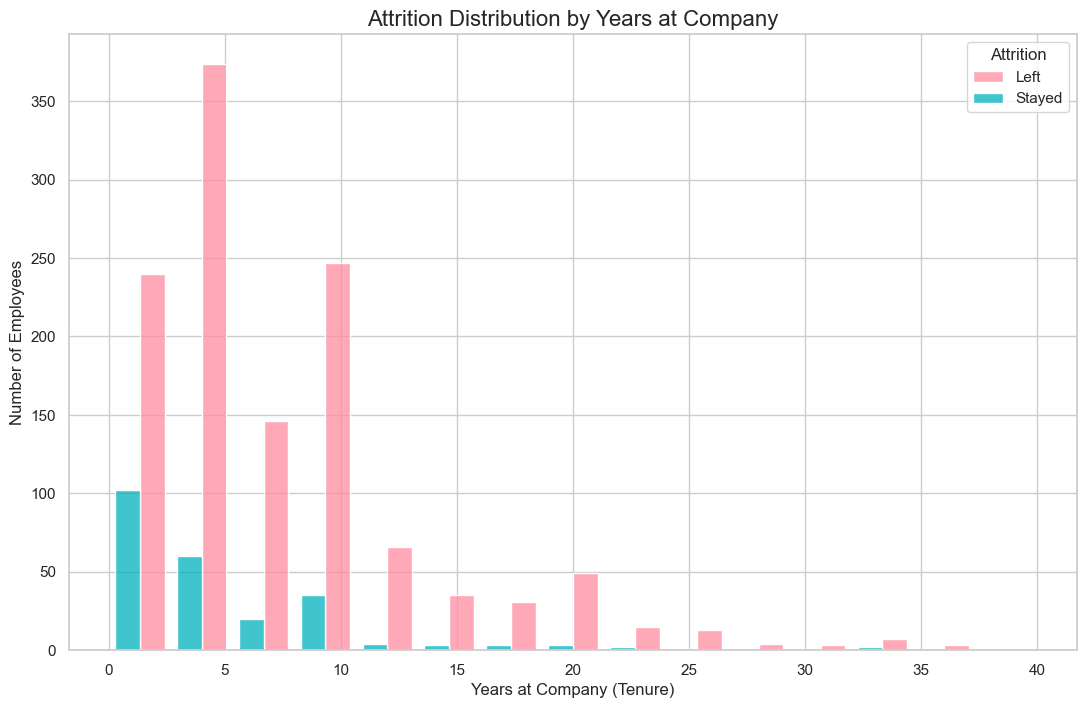

In [35]:
# Create a histogram to compare the distribution of YearsAtCompany
plt.figure(figsize=(13, 8))
sns.histplot(data=df_cleaned, x='YearsAtCompany', hue='Attrition',
             multiple='dodge', shrink=0.8, bins=15, palette=['#00B0BE', '#FF8CA1'])
plt.title('Attrition Distribution by Years at Company', fontsize=16)
plt.xlabel('Years at Company (Tenure)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Left', 'Stayed'])
plt.show()

**Insight:**

This histogram reveals a critical pattern. **The highest risk of attrition is within the first two years of employment.** A large number of employees leave very early in their tenure. After the five-year mark, the rate of attrition drops significantly. This suggests that the employee's initial experience at the company is crucial for long-term retention. A strong onboarding program could be key to fixing this.